In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, box

In [64]:
df = gpd.read_file("../results/results/test_results_clean.geojson")

In [65]:
df

,polyID,confidence,geometry
0,0,0.141959,"POLYGON ((504157.090 4346532.918, 504157.090 4..."
1,1,0.111056,"POLYGON ((502936.377 4348615.003, 502936.377 4..."
2,2,0.149852,"POLYGON ((503238.981 4349085.336, 503238.981 4..."
3,3,0.334212,"POLYGON ((505096.351 4349217.633, 505096.351 4..."
4,4,0.122452,"POLYGON ((503925.778 4349317.535, 503925.778 4..."
...,...,...,...
733,733,0.264853,"POLYGON ((512533.137 4353341.981, 512533.137 4..."
734,734,0.246031,"POLYGON ((504370.950 4353352.838, 504370.950 4..."
735,735,0.149733,"POLYGON ((498799.791 4352767.206, 498799.791 4..."
736,736,0.130422,"POLYGON ((500263.537 4352769.426, 500263.537 4..."


In [80]:
truth = gpd.read_file("../data/test_bbox_rev.shp")
truth.shape

(589, 29)

In [69]:
overlaps = gpd.sjoin(df, truth)

<AxesSubplot:>

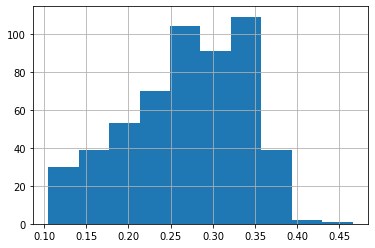

In [81]:
hard_posotive = df.loc[overlaps.index]
hard_posotive["confidence"].hist()

<AxesSubplot:>

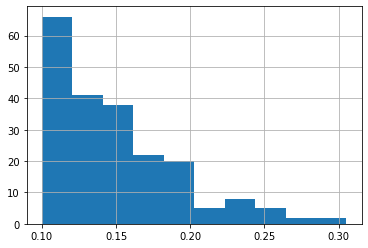

In [82]:
hard_negative = df.loc[~df.index.isin(overlaps.index)]
hard_negative["confidence"].hist()

In [77]:
hard_positive.to_file("../results/hard_posotive.geojson", driver='GeoJSON')
hard_negative.to_file("../results/hard_negative.geojson", driver='GeoJSON')

In [83]:
truth.shape[0]

589

In [94]:
not_in = gpd.sjoin(truth, res_bbox)
misses = truth.loc[~truth.index.isin(not_in.index)]

In [96]:
misses.to_file("../results/misses.geojson", driver='GeoJSON')

## ROC curve

1. add col for true positive and false positive 

In [106]:
df["true_positive"] = np.where(df.index.isin(overlaps.index), True, False)
df["false_positive"] = np.where(~df.index.isin(overlaps.index), True, False)

In [107]:
df

,polyID,confidence,geometry,true_positive,false_positive
0,0,0.141959,"POLYGON ((504157.090 4346532.918, 504157.090 4...",False,True
1,1,0.111056,"POLYGON ((502936.377 4348615.003, 502936.377 4...",False,True
2,2,0.149852,"POLYGON ((503238.981 4349085.336, 503238.981 4...",False,True
3,3,0.334212,"POLYGON ((505096.351 4349217.633, 505096.351 4...",True,False
4,4,0.122452,"POLYGON ((503925.778 4349317.535, 503925.778 4...",False,True
...,...,...,...,...,...
733,733,0.264853,"POLYGON ((512533.137 4353341.981, 512533.137 4...",True,False
734,734,0.246031,"POLYGON ((504370.950 4353352.838, 504370.950 4...",True,False
735,735,0.149733,"POLYGON ((498799.791 4352767.206, 498799.791 4...",False,True
736,736,0.130422,"POLYGON ((500263.537 4352769.426, 500263.537 4...",False,True


In [112]:
from sklearn import metrics
import matplotlib.pyplot as plt

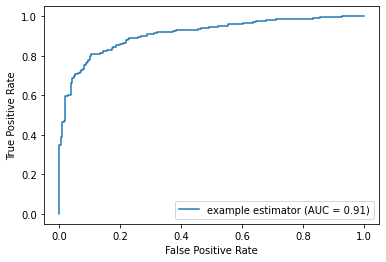

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(df.true_positive, df.confidence)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()      